In [1]:
import sys
sys.path.append('./../')
import os
from definitions import ROOT_DIR
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
result_path = os.path.join(ROOT_DIR, 'exp', 'results')

In [3]:
def parse_results(path, args):
    with open(path, 'r') as handle:
        failure = None
        args_dict = None
        for line in handle:
            if line.startswith('Test'):
                failure = float(line.strip().split(':           ')[1])
            elif line.startswith('Namespace'):
                args_dict = {}
                fields = line.lstrip('Namespace(').rstrip(')').strip().split(', ')
                for field in fields:
                    key, value = field.split('=')
                    if key in args:
                        args_dict[key] = value
            else:
                pass
    return failure, args_dict

In [13]:
import matplotlib.cm as cm
c_map = cm.get_cmap('Set2')
colors = list(c_map.colors)
c_map = cm.get_cmap('Set3')
colors += list(c_map.colors)

import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style('darkgrid')

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=False)

10


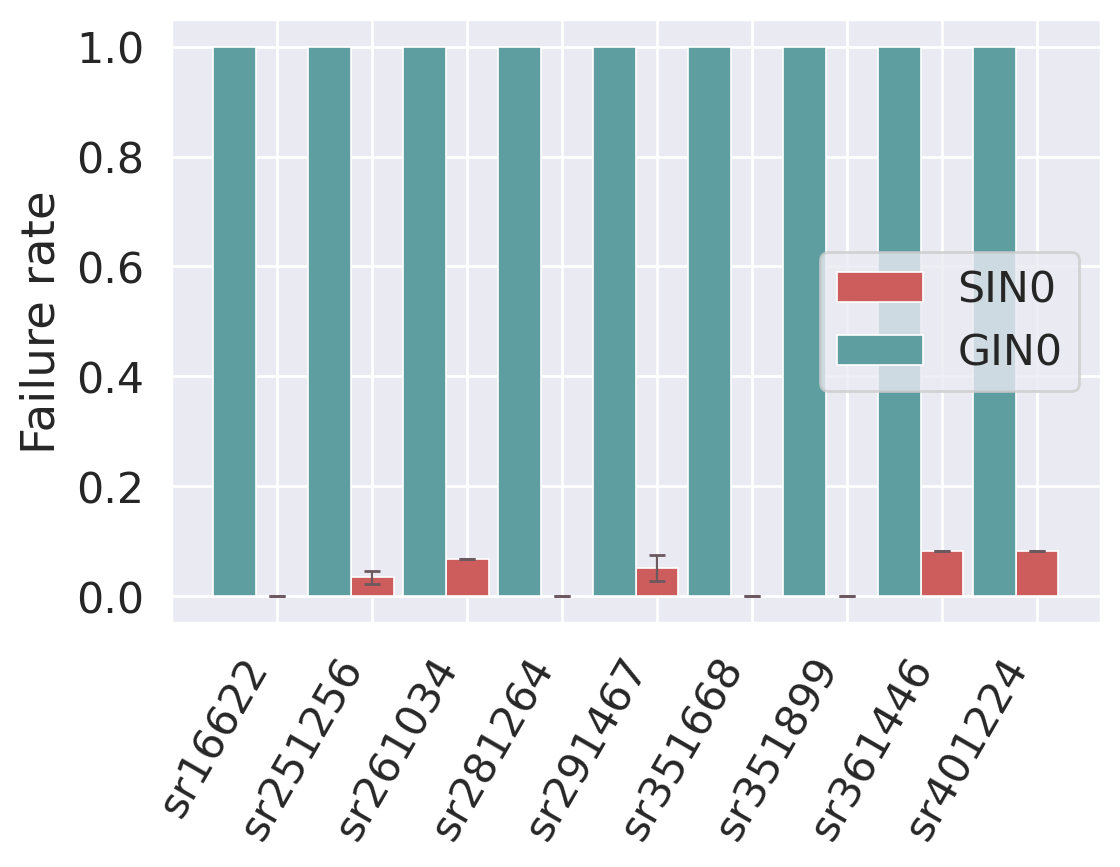

In [14]:
exps = [
    'sr-1612440589.8705556',
    'sr-1612440492.8809211',
    'sr-1612440077.6010451',
    'sr-1612439811.4636881',
    'sr-1612439413.8549275',
    'sr-1612439282.745276',
    'sr-1612438858.7870247',
    'sr-1612438748.4305906',
    'sr-1612438690.1099362',
    'sr-1612438667.175068']
print(len(exps))
results = dict()
for exp in exps:
    folder = './results/{}/*/results.txt'.format(exp)
    for path in glob.glob(folder):
        r = parse_results(path, ['max_dim', 'num_layers', 'dataset', 'nonlinearity'])
        assert int(r[1]['num_layers']) == 1, r[1]['num_layers']
        assert str(r[1]['nonlinearity']) == "'elu'", exp
        if r[1]['dataset'] not in results:
            results[r[1]['dataset']] = list()
        results[r[1]['dataset']].append(r[0])
        
means = [np.mean(results[dataset]) for dataset in sorted(results)]
stds = [np.std(results[dataset]) for dataset in sorted(results)]

plt.figure(dpi=200)
labels = [dataset.strip("'") for dataset in sorted(results)]
for d, datum in enumerate(means):
    label = 'SIN0' if d == 0 else None
    plt.bar([d+0.45], [datum], yerr=[stds[d]/np.sqrt(len(exps))], color='indianred', label=label,
            width=0.45,
            log=False, 
            capsize=3,
            lw=0.6,
            ecolor='#6b595f',
            error_kw={'lw': 0.8})
    label='GIN0' if d == 0 else None
    plt.bar([d], [1.0], color='cadetblue', label=label,
            width=0.45,
            log=False, 
            capsize=3,
            lw=0.6,
            ecolor='#6b595f',
            error_kw={'lw': 0.8})
plt.legend(loc='right')
plt.ylim([-0.05,1.05])
plt.ylabel('Failure rate')
plt.xticks(np.asarray(range(len(means)))+0.45, labels, rotation=60, ha='right')
plt.show()
plt.close()

In [ ]:
print(means[4], stds[4])
results["'sr291467'"]

1


NameError: name 'data' is not defined

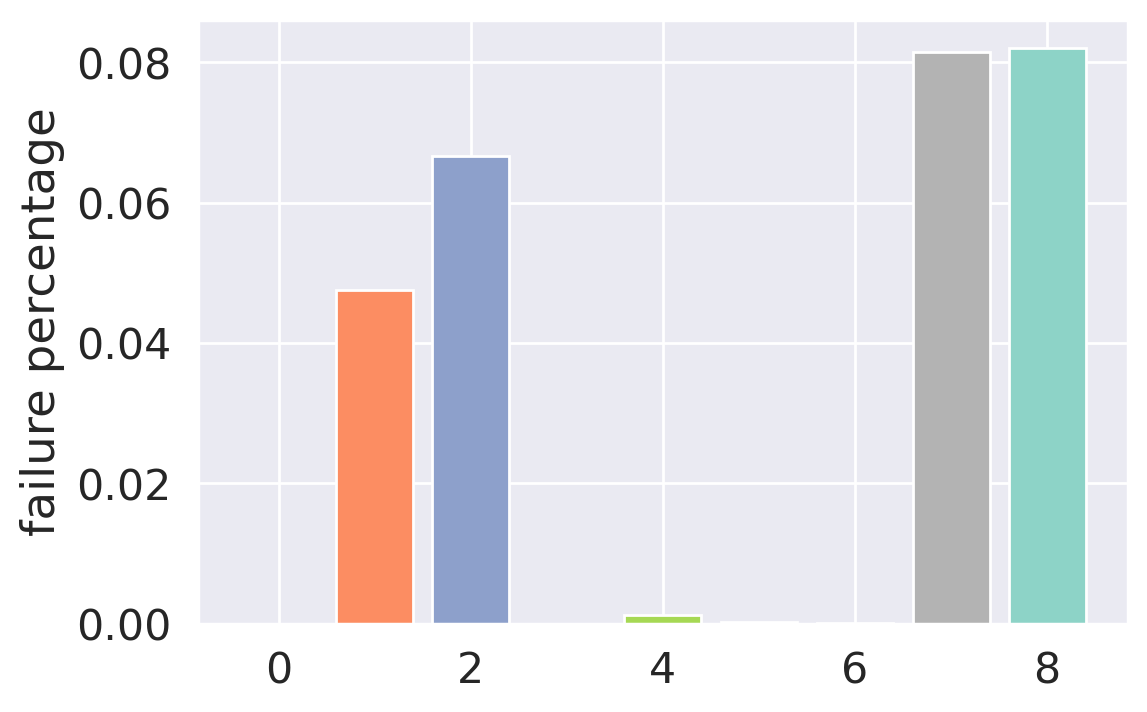

In [6]:
exps = [
    'sr-1612440857.296867']
print(len(exps))
results = dict()
for exp in exps:
    folder = './results/{}/*/results.txt'.format(exp)
    for path in glob.glob(folder):
        r = parse_results(path, ['max_dim', 'num_layers', 'dataset', 'nonlinearity'])
        assert int(r[1]['num_layers']) == 2, r[1]['num_layers']
        assert str(r[1]['nonlinearity']) == "'elu'", exp
        if r[1]['dataset'] not in results:
            results[r[1]['dataset']] = list()
        results[r[1]['dataset']].append(r[0])
        
means = [np.mean(results[dataset]) for dataset in sorted(results)]
stds = [np.std(results[dataset]) for dataset in sorted(results)]

plt.figure(dpi=200)
labels = [dataset.strip("'") for dataset in sorted(results)]
for d, datum in enumerate(means):
    plt.bar([d], [datum], yerr=[stds[d]], label=labels[d], color=colors[d], log=False)
# plt.boxplot([results[dataset] for dataset in sorted(results)])
plt.ylabel('failure percentage')
plt.xticks(range(len(data)), labels, rotation=90, fontsize=8)
plt.title('num layers: {}'.format(2), fontsize=9)
plt.show()
plt.close()

1


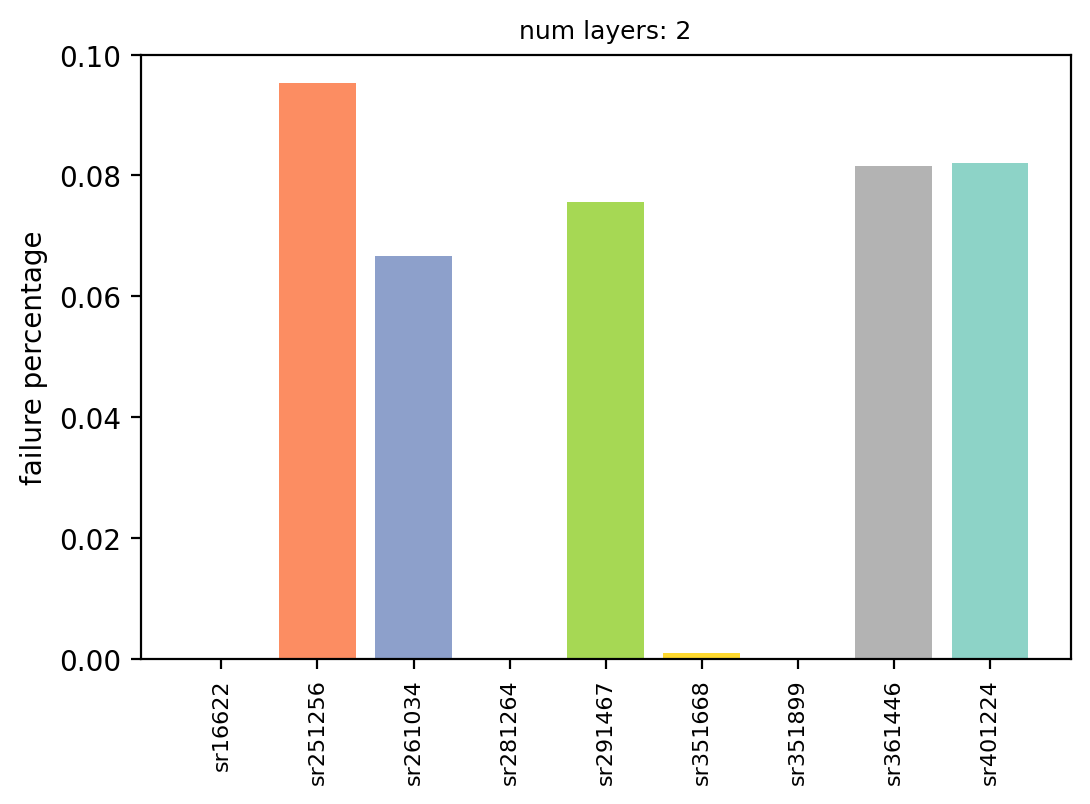

In [44]:
exps = [
    'sr-1612441021.745767']
print(len(exps))
results = dict()
for exp in exps:
    folder = './results/{}/*/results.txt'.format(exp)
    for path in glob.glob(folder):
        r = parse_results(path, ['max_dim', 'num_layers', 'dataset', 'nonlinearity'])
        assert int(r[1]['num_layers']) == 2, r[1]['num_layers']
        assert str(r[1]['nonlinearity']) == "'id'", exp
        if r[1]['dataset'] not in results:
            results[r[1]['dataset']] = list()
        results[r[1]['dataset']].append(r[0])
        
means = [np.mean(results[dataset]) for dataset in sorted(results)]
stds = [np.std(results[dataset]) for dataset in sorted(results)]

plt.figure(dpi=200)
labels = [dataset.strip("'") for dataset in sorted(results)]
for d, datum in enumerate(means):
    plt.bar([d], [datum], yerr=[stds[d]], label=labels[d], color=colors[d], log=False)
# plt.boxplot([results[dataset] for dataset in sorted(results)])
plt.ylabel('failure percentage')
plt.xticks(range(len(data)), labels, rotation=90, fontsize=8)
plt.title('num layers: {}'.format(2), fontsize=9)
plt.show()
plt.close()

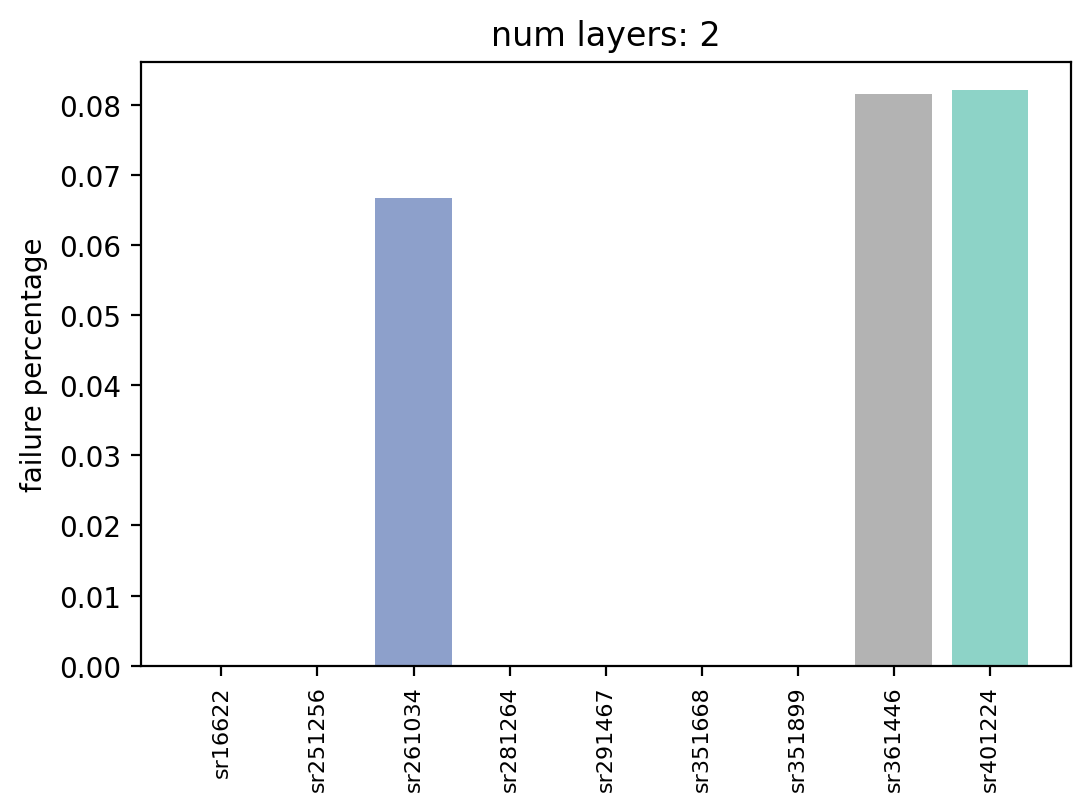

In [16]:
results = dict()
for path in glob.glob('./results/20210126_all_families_2_layers/*/results.txt'):
    r = parse_results(path, ['max_dim', 'num_layers', 'dataset'])
    assert int(r[1]['max_dim']) == 5
    assert int(r[1]['num_layers']) == 2
    results[r[1]['dataset']] = r[0]
data = [results[dataset] for dataset in sorted(results)]

plt.figure(dpi=200)
labels = [dataset.strip("'") for dataset in sorted(results)]
for d, datum in enumerate(data):
    plt.bar([d], [datum], label=labels[d], color=colors[d], log=False)
plt.ylabel('failure percentage')
plt.xticks(range(len(data)), labels, rotation=90, fontsize=8)
plt.title('num layers: {}'.format(2))
plt.show()
plt.close()

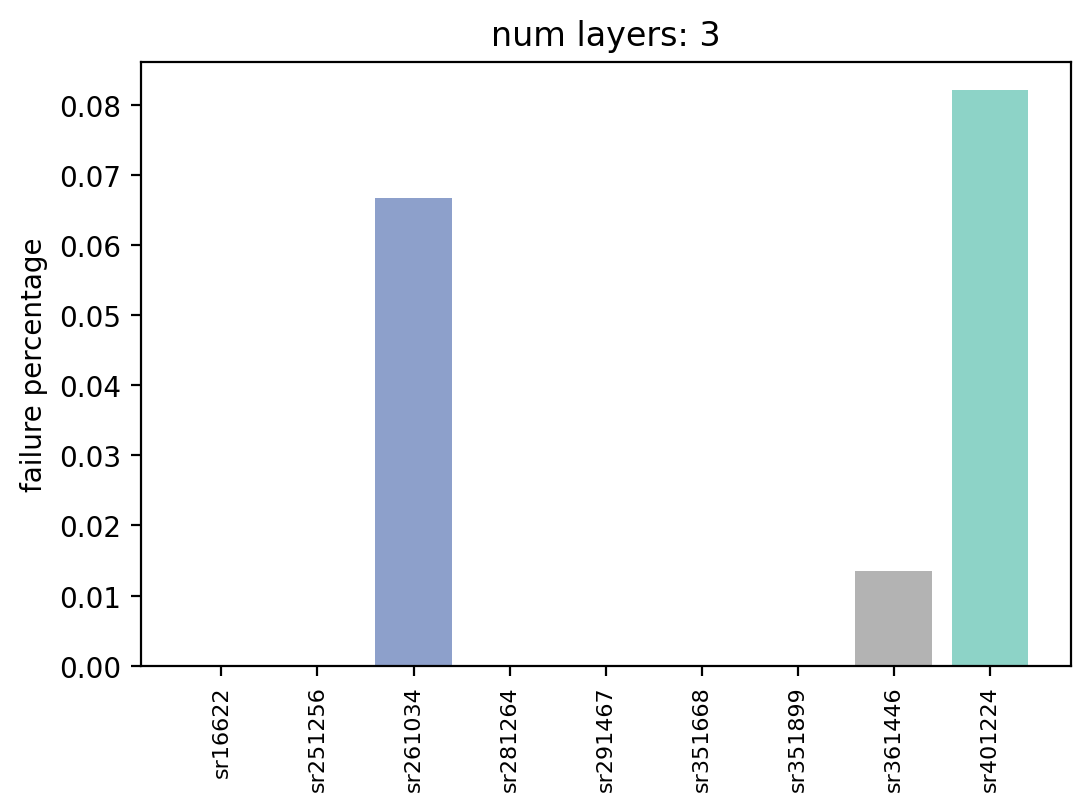

In [141]:
results = dict()
for path in glob.glob('./results/20210126_all_families_3_layers/*/results.txt'):
    r = parse_results(path, ['max_dim', 'num_layers', 'dataset'])
    assert int(r[1]['max_dim']) == 5
    assert int(r[1]['num_layers']) == 3
    results[r[1]['dataset']] = r[0]
data = [results[dataset] for dataset in sorted(results)]

plt.figure(dpi=200)
labels = [dataset.strip("'") for dataset in sorted(results)]
for d, datum in enumerate(data):
    plt.bar([d], [datum], label=labels[d], color=colors[d], log=False)
plt.ylabel('failure percentage')
plt.xticks(range(len(data)), labels, rotation=90, fontsize=8)
plt.title('num layers: {}'.format(3))
plt.show()
plt.close()

In [ ]:
paths = {
    (2,1): os.path.join(result_path, 'sr251256-1611651492.0265548', 'results.txt'),
    (3,1): os.path.join(result_path, 'sr251256-1611651505.5357134', 'results.txt'),
    (4,1): os.path.join(result_path, 'sr251256-1611651527.8741536', 'results.txt'),
    (5,1): os.path.join(result_path, 'sr251256-1611651540.5206594', 'results.txt'),
    (2,2): os.path.join(result_path, 'sr251256-1611652545.50899', 'results.txt'),
    (3,2): os.path.join(result_path, 'sr251256-1611652521.5896332', 'results.txt'),
    (4,2): os.path.join(result_path, 'sr251256-1611651566.272134', 'results.txt')}

data = list()
for dim in range(2, 6):
    with open(paths[(dim, 1)], 'r') as handle:
        for line in handle:
            if line.startswith('Test'):
                failure = float(line.strip().split(':           ')[1])
                data.append(failure)
                break
for dim in range(2, 5):
    with open(paths[(dim, 2)], 'r') as handle:
        for line in handle:
            if line.startswith('Test'):
                failure = float(line.strip().split(':           ')[1])
                data.append(failure)
                break

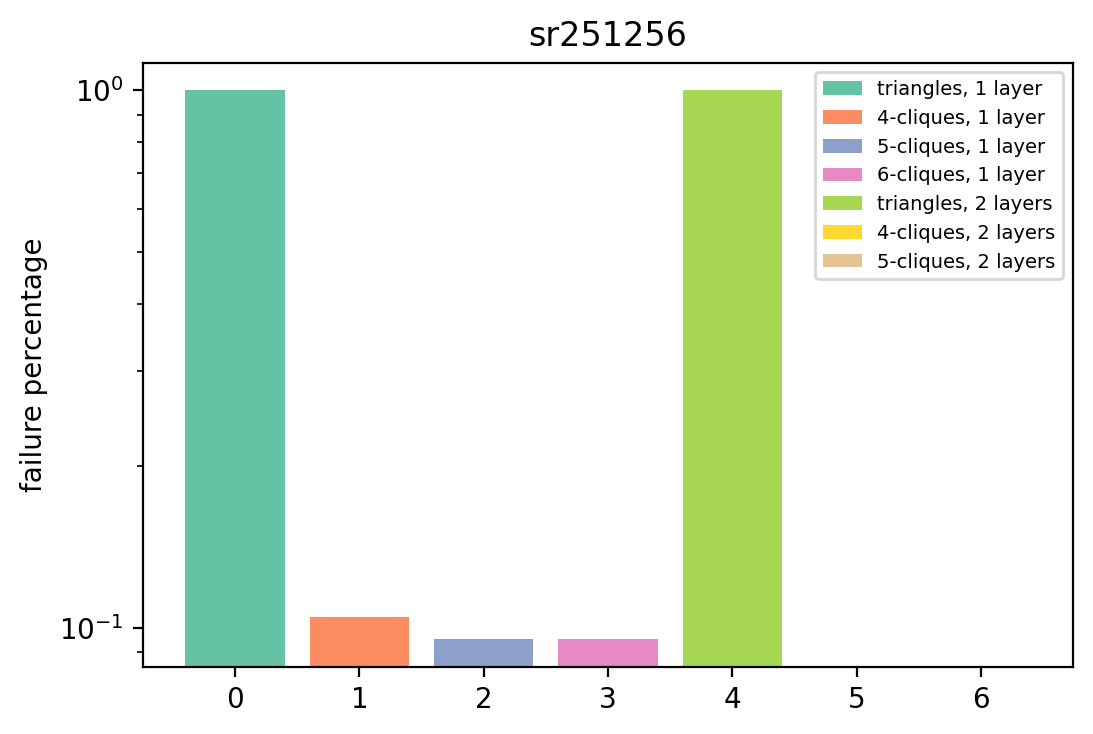

In [99]:
import matplotlib.cm as cm
c_map = cm.get_cmap('Set2')
colors = c_map.colors
plt.figure(dpi=200)
labels = [
    'triangles, 1 layer',
    '4-cliques, 1 layer',
    '5-cliques, 1 layer',
    '6-cliques, 1 layer',
    'triangles, 2 layers',
    '4-cliques, 2 layers',
    '5-cliques, 2 layers']
for d, datum in enumerate(data):
    plt.bar([d], [datum], label=labels[d], color=colors[d], log=True)
plt.ylabel('failure percentage')
plt.title('sr251256')
plt.legend(fontsize='7')
plt.show()
plt.close()

In [82]:
import networkx as nx
data_path = os.path.join(ROOT_DIR, 'datasets/SR_graphs/raw/sr251256.g6')
nx_graphs = nx.read_graph6(data_path)

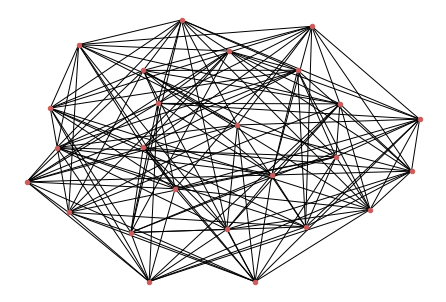

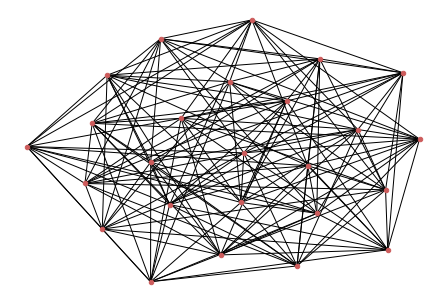

In [97]:
plt.figure()
nx.draw(nx_graphs[0], node_size=20, node_color='indianred')
plt.show()
plt.close()

plt.figure()
nx.draw(nx_graphs[1], node_size=20, node_color='indianred')
plt.show()
plt.close()